<center>
<h1> Analysis of Virginia Tech's Flint Water Data </h1>
<h2> A case study in model parameter estimation. </h2>
<h3> Russel Wilcox-Cline </h3>
<p>  <a href="www.flintwaterstudy.org">Data Source:</a> www.flintwaterstudy.org </p>
</center>





<h2> Introduction </h2>

<p> We begin by importing the required modules (numpy, pandas, matplotlib, and scipy.stats).

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import matplotlib.gridspec as gridspec #Used for organizing figures
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

<p> The data consist of three measurements taken from when the faucet was first turned on (first draw) and two measurements taken after the faucet was running for 45 seconds and two minutes respectively (45 second flush and 2 minute flush). To upload the data we use the Pandas function:  <font face="Courier" color="green">pd.readcsv()</font>. The data is stored as a Pandas dataframe and each set of measurements can be called using the header name. Each set of measurements is then stored as a numpy array to easily perform calculations.

In [2]:
multiple_draws = pd.read_csv('FlintPb_VirginiaTech.csv')

concentration_first_draw = np.array(multiple_draws['Pb Bottle 1 (ppb) - First Draw'])
concentration_45sec_flush = np.array(multiple_draws['Pb Bottle 2 (ppb) - 45 secs flushing'])
concentration_2min_flush = np.array(multiple_draws['Pb Bottle 3 (ppb) - 2 mins flushing'])

multiple_draws.head()

,Pb Bottle 1 (ppb) - First Draw,Pb Bottle 2 (ppb) - 45 secs flushing,Pb Bottle 3 (ppb) - 2 mins flushing
0,0.344,0.226,0.145
1,8.133,10.770,2.761
2,1.111,0.110,0.123
3,8.007,7.446,3.384
4,1.951,0.048,0.035


<p> Now that the data are uploaded and stored as variables, let us examine how the measurements are distributed. <p>

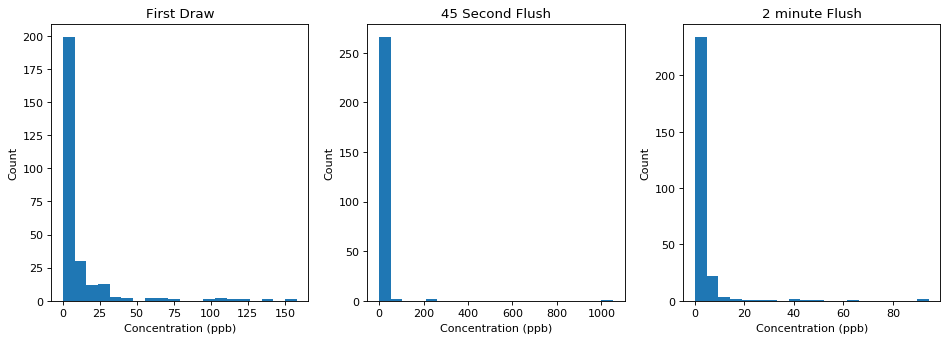

In [3]:
gs = gridspec.GridSpec(3, 3)

plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(gs[0, 0]) # row 0, col 0
ax.hist(concentration_first_draw, bins = 20)
ax.set_xlabel('Concentration (ppb)')
ax.set_ylabel('Count')
ax.set_title('First Draw')

ax1 = plt.subplot(gs[0, 1]) # row 0, col 1
ax1.hist(concentration_45sec_flush, bins = 20)
ax1.set_xlabel('Concentration (ppb)')
ax1.set_ylabel('Count')
ax1.set_title('45 Second Flush')

ax2 = plt.subplot(gs[0, 2]) # row 1, span all columns
ax2.hist(concentration_2min_flush, bins = 20)
ax2.set_xlabel('Concentration (ppb)')
ax2.set_ylabel('Count')
ax2.set_title('2 minute Flush')

plt.tight_layout()
plt.show()

<p> Let us observe that each of these distributions is skewed to the left. Ideally we want to determine the relationship between the first draw and each of the two subsequent draws, which requires us to estimate the model parameters that transforms the independent variable to the dependent variable (observed data). In order to estimate these model parameters we have to solve an inverse problem, which is most easily done in the case where we have a linear problem that follows Gaussian statistics. Clearly our data does not follow a Gaussian distribution, so lets us reparameterize the problem using the transformation: 

$$ d' = \log_{10}(d) $$

and re-examine the distribution of our measurements.

In [4]:
log_concentration_2min_flush = np.log10(concentration_2min_flush)
log_concentration_first_draw = np.log10(concentration_first_draw)
log_concentration_45sec_flush = np.log10(concentration_45sec_flush)

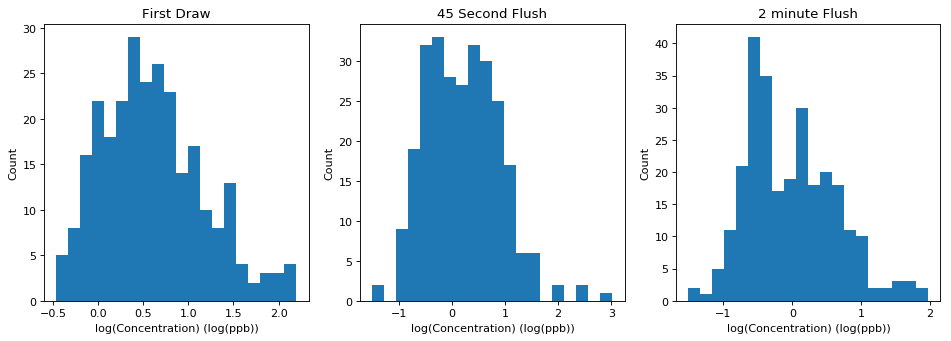

In [5]:
gs = gridspec.GridSpec(3, 3)

plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(gs[0, 0]) # row 0, col 0
ax.hist(log_concentration_first_draw, bins = 20)
ax.set_xlabel('log(Concentration) (log(ppb))')
ax.set_ylabel('Count')
ax.set_title('First Draw')

ax1 = plt.subplot(gs[0, 1]) # row 0, col 1
ax1.hist(log_concentration_45sec_flush, bins = 20)
ax1.set_xlabel('log(Concentration) (log(ppb))')
ax1.set_ylabel('Count')
ax1.set_title('45 Second Flush')

ax2 = plt.subplot(gs[0, 2]) # row 1, span all columns
ax2.hist(log_concentration_2min_flush, bins = 20)
ax2.set_xlabel('log(Concentration) (log(ppb))')
ax2.set_ylabel('Count')
ax2.set_title('2 minute Flush')

plt.tight_layout()
plt.show()

Qualitatively, it is observed that the new distributions follow a Gaussian distribution. To confirm this we look at the quantile-quantile plot, which compares the sorted values of the normalized concentration to the quantiles of Gaussian PDF; if the distribution of data is Gaussian then this plot should be a 1:1 line. 

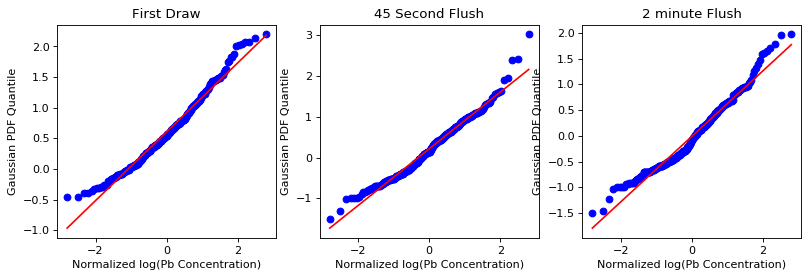

In [6]:
plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0]) # row 0, col 0
res = stats.probplot(np.sort(log_concentration_first_draw), plot=plt)
ax.set_xlabel('Normalized log(Pb Concentration)')
ax.set_ylabel('Gaussian PDF Quantile')
ax.set_title('First Draw')

ax1 = plt.subplot(gs[0, 1]) # row 0, col 1
res = stats.probplot(np.sort(log_concentration_45sec_flush), plot=plt)
ax1.set_xlabel('Normalized log(Pb Concentration)')
ax1.set_ylabel('Gaussian PDF Quantile')
ax1.set_title('45 Second Flush')

ax2 = plt.subplot(gs[0, 2]) # row 1, span all columns
res = stats.probplot(np.sort(log_concentration_2min_flush), plot=plt)
ax2.set_xlabel('Normalized log(Pb Concentration)')
ax2.set_ylabel('Gaussian PDF Quantile')
ax2.set_title('2 minute Flush')

plt.show()

<p> In each of the of the quantile-quantile plots we see that, with the exception of the endpoints, the transformed data follow Gaussian distribution more closely. In this case it will be easier for us to work with the transformed data as opposed to the initial data. </p>

<p> In general, the lead concentrations in the water should decrease as the tap is flushed. Therefore the lead concentration should be lower for the 45 second and 2 minute samples as compared to the first draw. This can be observed by plotting the flushed samples as a function of the first draw. If the concentrations of the initial draw and of the later draw are equal then the point will lie on a 1:1 line. If the later measurements are either higher or lower then the plotted point will lie above and below, respectively of the 1:1 line. </p>

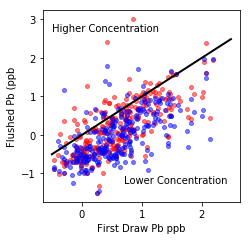

In [7]:
fig = plt.figure(figsize= (12, 12))
ax = plt.subplot(gs[0, 0])
ax.plot(log_concentration_first_draw, log_concentration_45sec_flush, 'o', markersize = '4', alpha = 0.5, color = 'red', label = '45 sec')
ax.plot(log_concentration_first_draw, log_concentration_2min_flush, 'o', markersize = '4', alpha = 0.5, color = 'blue', label = '45 sec')
ax.plot(np.arange(-0.5, 2.5, 0.01), np.arange(-0.5, 2.5, 0.01), linewidth = 2, color = 'k')
ax.set_xlabel('First Draw Pb ppb')
ax.set_ylabel('Flushed Pb (ppb')
ax.text(-.5, 2.7, 'Higher Concentration')
ax.text(0.7, -1.25, 'Lower Concentration')
plt.show()


<h3> Model Estimation: Least Squares </h3>

<p> In the above section it was shown that the transformed data can be approximated by a linear relationship such that:

$$d = m_{1}x + m_{2}$$

where $d$ is the value of flushed measurement and $x$ is the value of the initial draw. In our case we have an overdetermined system. Recall that in order to solve a system equations, the number of equations must be equal to the number of unknowns. In our case we have far more data than equations and therefore want to find the "best fit" line that minimizes the error, also called the residual, between the estimated data value from the model to the observed data. In the least squares estimation we seek the minimize the Euclidian distance (L2 norm) between the two values. Let $\textbf{G}$ be the system matrix, $\vec{m}$ be the model parameters, and $\vec{d}$ be the observed data we want to approximate with the model. We can solve for the set of model parameters using the following:

$$\textbf{G}\vec{m}=\vec{d}$$
$$\textbf{G}^{T}\textbf{G}\vec{m}=\textbf{G}^{T}\vec{d}$$
$$\vec{m}=(\textbf{G}^{T}\textbf{G})^{-1}\textbf{G}^{T}\vec{d}$$

The function below is used to calculate values of the estimated model parameters. 

In [8]:
def Least_Squares_Fit(number_model_parameters, data, observations):
    
    G = np.ones((len(observations), number_model_parameters))
    G[:, 0] = observations
    d = data
    Gd = np.dot(G.T, d)
    H = np.dot(G.T, G)
    H_inv = np.linalg.inv(H)
    m_est  = np.dot(H_inv, Gd)
    m_est = m_est.flatten()
    
    return m_est 

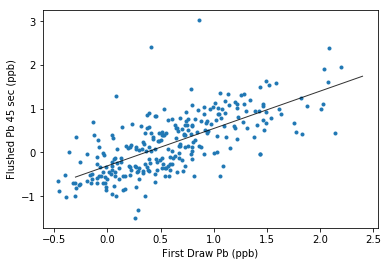

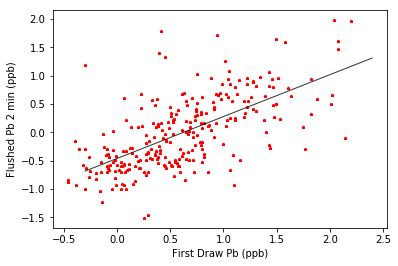

In [9]:
m_est_45sec = Least_Squares_Fit(2, log_concentration_45sec_flush, log_concentration_first_draw)
m_est_2min = Least_Squares_Fit(2, log_concentration_2min_flush, log_concentration_first_draw)

interpolation_points = np.log10(np.linspace(0.5, 250, 250))

d_est_45sec = m_est_45sec[0]*interpolation_points+m_est_45sec[1]
d_est_2min = m_est_2min[0]*interpolation_points+m_est_2min[1]

fig = plt.figure()
fig.subplots_adjust(hspace=1)
ax5 = fig.add_subplot(111)
ax5.set_xlabel('First Draw Pb (ppb)')
ax5.set_ylabel('Flushed Pb 45 sec (ppb)')
ax5.plot(log_concentration_first_draw, log_concentration_45sec_flush, 'o', markersize = 3, label = '45 sec')
ax5.plot(interpolation_points, d_est_45sec, '-', linewidth = 1, alpha = 0.8, color = 'k')
plt.show()

fig = plt.figure()
ax6 = fig.add_subplot(111)
ax6.set_xlabel('First Draw Pb (ppb)')
ax6.set_ylabel('Flushed Pb 2 min (ppb)')
ax6.plot(log_concentration_first_draw, log_concentration_2min_flush, '*', markersize = 3, label = '2 min', color = 'red')
ax6.plot(interpolation_points, d_est_2min, '-', linewidth = 1, alpha = 0.8, color = 'k')
plt.show()

<p> Now we want to asses the confidence of the model parameters we calculated. This can be done through bootstrapping.  In an perfect world we would like to have many repetations of the datasets, where we would then calculate the model parameters for each dataset to then estimate a distribution of the model parameters. Nn many cases this is not possible, however, we can construct a new dataset by randomly sampling (with replacement) the given dataset which can then be used to construct distribtutions for each model parameter. It should be noted that in our case, because we are given a linear estimation problem, we would expect the distributions of the model parameters to follow a Gaussian PDF. </p>

<p> Let us consider create $10^{5}$ new datasets each with 300 samples. 

In [10]:
def bootstrap(num_draws, num_trials, num_model_paramters, data, observation):

    num_samples = len(data)
    model_parameters = np.zeros((num_trials, num_model_parameters))
    samples = np.zeros((num_draws, num_model_paramters))
    
    for j in range(num_trials-1):
        for i in range(num_draws-1):

            draw = np.random.randint(0,num_samples)
            samples[i, 0] = observation[draw]
            samples[i, 1] = data[draw]

        m_est = Least_Squares_Fit(num_model_parameters, samples[:, 1], samples[:, 0])
        
        model_parameters[j, :] = m_est
        
    return model_parameters

In [11]:
num_draws= 300
num_trials = 10**3
num_model_parameters = 2

mest_bootstrap_45 = bootstrap(num_draws, num_trials, num_model_parameters, log_concentration_45sec_flush, log_concentration_first_draw)
mest_bootstrap_2 = bootstrap(num_draws, num_trials, num_model_parameters, log_concentration_2min_flush, log_concentration_first_draw)


In [12]:
mest_bootstrap_45 = mest_bootstrap_45[:-1, :]
mest_bootstrap_2 = mest_bootstrap_2[:-1, :]

m_est_45_bootstrap = np.array([np.mean(mest_bootstrap_45[:, 0]), np.mean(mest_bootstrap_45[:, 1])])
m_est_2_bootstrap = np.array([np.mean(mest_bootstrap_2[:, 0]), np.mean(mest_bootstrap_2[:, 1])])


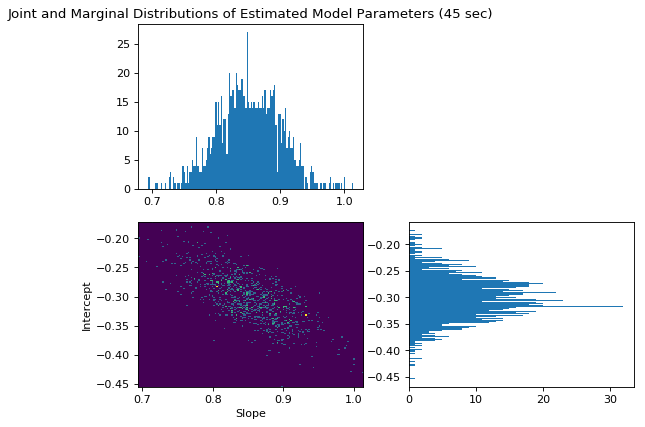

In [13]:
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(gs[0, 0]) # row 0, col 0
plt.hist(mest_bootstrap_45[:, 0], bins = 150)
plt.title('Joint and Marginal Distributions of Estimated Model Parameters (45 sec)')

ax1 = plt.subplot(gs[1, 1]) # row 0, col 1
plt.hist(mest_bootstrap_45[:, 1], bins = 150, orientation= 'horizontal')

ax2 = plt.subplot(gs[1, 0]) # row 1, span all columns
plt.hist2d(mest_bootstrap_45[:,0], mest_bootstrap_45[:, 1], bins = 150)
ax2.set_xlabel('Slope')
ax2.set_ylabel('Intercept')

plt.show()

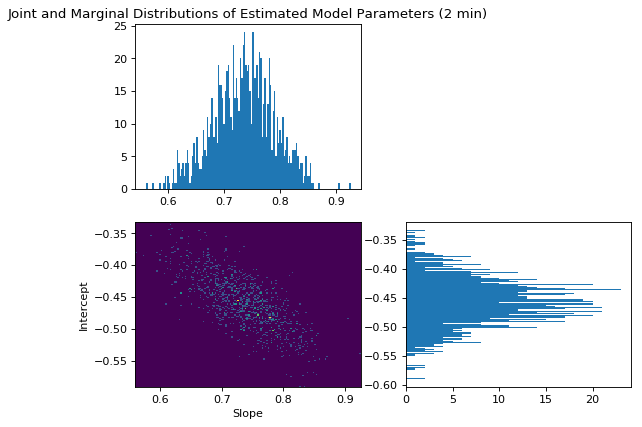

In [14]:
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(gs[0, 0]) # row 0, col 0
plt.hist(mest_bootstrap_2[:, 0], bins = 150)
plt.title('Joint and Marginal Distributions of Estimated Model Parameters (2 min)')

ax1 = plt.subplot(gs[1, 1]) # row 0, col 1
plt.hist(mest_bootstrap_2[:, 1], bins = 150, orientation= 'horizontal')

ax2 = plt.subplot(gs[1, 0]) # row 1, span all columns
plt.hist2d(mest_bootstrap_2[:,0], mest_bootstrap_2[:, 1], bins = 150)
ax2.set_xlabel('Slope')
ax2.set_ylabel('Intercept')

plt.show()

<p> Both model parameters for each case, 45 second and two minute respectively, appear to follow a Gaussian PDF as expected. We can quantitatively verify this by examining the quantile-quantile plot for each parameter, which is shown below. </p>

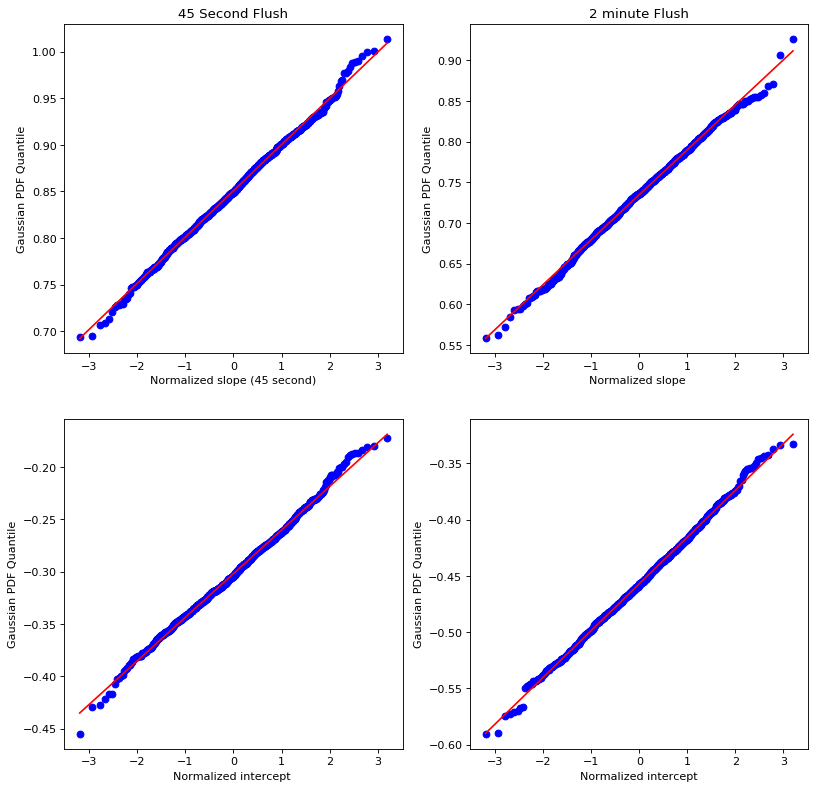

In [15]:
plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0]) # row 0, col 0
res = stats.probplot(np.sort(mest_bootstrap_45[:, 0]), plot=plt)
ax.set_xlabel('Normalized slope (45 second)')
ax.set_ylabel('Gaussian PDF Quantile')
ax.set_title('45 Second Flush')

ax1 = plt.subplot(gs[1, 0]) # row 0, col 1
res = stats.probplot(np.sort(mest_bootstrap_45[:, 1]), plot=plt)
ax1.set_xlabel('Normalized intercept ')
ax1.set_ylabel('Gaussian PDF Quantile')
ax1.set_title('')

ax2 = plt.subplot(gs[0, 1]) # row 1, span all columns
res = stats.probplot(np.sort(mest_bootstrap_2[:, 0]), plot=plt)
ax2.set_xlabel('Normalized slope ')
ax2.set_ylabel('Gaussian PDF Quantile')
ax2.set_title('2 minute Flush')

ax3 = plt.subplot(gs[1, 1]) # row 1, span all columns
res = stats.probplot(np.sort(mest_bootstrap_2[:, 1]), plot=plt)
ax3.set_xlabel('Normalized intercept')
ax3.set_ylabel('Gaussian PDF Quantile')
ax3.set_title('')

plt.show()

In [16]:
#Bootstrap Analysis 45second flush

mest_45_slope_mean = np.mean(mest_bootstrap_45[:, 0])
mest_45_slope_stdev = np.std(mest_bootstrap_45[:, 0], ddof = 1)

mest_45_int_mean = np.mean(mest_bootstrap_45[:, 1])
mest_45_int_stdev = np.std(mest_bootstrap_45[:, 1], ddof = 1)

mest_2_slope_mean = np.mean(mest_bootstrap_2[:, 0])
mest_2_slope_stdev = np.std(mest_bootstrap_2[:, 0], ddof = 1)

mest_2_int_mean = np.mean(mest_bootstrap_2[:, 1])
mest_2_int_stdev = np.std(mest_bootstrap_2[:, 1], ddof = 1)

x = np.linspace(-2, 2, 1000)



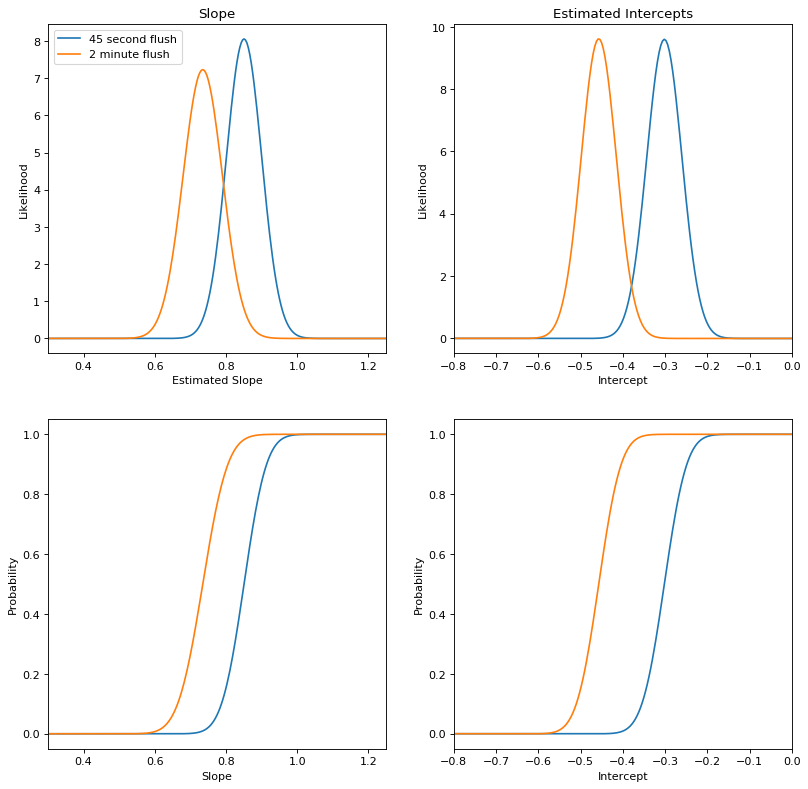

In [17]:
plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0]) # row 0, col 0
ax.plot(x, stats.norm.pdf(x,mest_45_slope_mean, mest_45_slope_stdev), label = '45 second flush')
ax.plot(x, stats.norm.pdf(x,mest_2_slope_mean, mest_2_slope_stdev), label = '2 minute flush')
ax.legend(loc = 'upper left')
ax.set_xlabel('Estimated Slope')
ax.set_ylabel('Likelihood')
ax.set_xlim([0.3, 1.25])
ax.set_title('Slope')

ax1 = plt.subplot(gs[1, 0]) # row 0, col 1
ax1.plot(x, stats.norm.cdf(x,mest_45_slope_mean, mest_45_slope_stdev), label = '45 second flush')
ax1.plot(x, stats.norm.cdf(x,mest_2_slope_mean, mest_2_slope_stdev), label = '2 minute flush')
ax1.set_xlabel('Slope')
ax1.set_ylabel('Probability')
ax1.set_xlim([0.3, 1.25])

ax2 = plt.subplot(gs[0, 1]) # row 1, span all columns
ax2.plot(x, stats.norm.pdf(x,mest_45_int_mean, mest_45_int_stdev), label = '45 second flush')
ax2.plot(x, stats.norm.pdf(x,mest_2_int_mean, mest_2_int_stdev), label = '2 minute flush')
ax2.set_xlabel('Intercept')
ax2.set_ylabel('Likelihood')
ax2.set_xlim([-.8, 0])
ax2.set_title('Estimated Intercepts')

ax3 = plt.subplot(gs[1, 1]) # row 0, col 1
ax3.plot(x, stats.norm.cdf(x,mest_45_int_mean, mest_45_int_stdev), label = '45 second flush')
ax3.plot(x, stats.norm.cdf(x,mest_2_int_mean, mest_2_int_stdev), label = '2 minute flush')
ax3.set_xlabel('Intercept')
ax3.set_ylabel('Probability')
ax3.set_xlim([-.8, 0])




plt.show()


<h3> Model Estimation: Markov-Chain Monte Carlo </h3>

<p> Another way to estimate model parameters, which is best suited for non-linear estimation problems, is by using a Markov-Chain Monte Carlo (MCMC) method. In this method we essentially guess a set of model parameters each step. If the likelihood of the next step is greater than a random number then the step is accepted and we move forward to the next guess. If the likelihood is less than a that randomly generated number then we stay on the same step and retain the model parameters. One can think of this as an educated random walk. The goal of the MCMC is to generate a distribution of model parameters, which are known as the posterior distributions. </p>

In [18]:
n_steps = 10**3
initial_guess = np.array([0, 0])
step_size = 0.01

steps_45 = np.zeros((n_steps, len(initial_guess)))
steps_45[0, :] = initial_guess

for i in range(n_steps-1):

    old_step = steps_45[i, :]
    x_old = steps_45[i, 0]
    y_old = steps_45[i, 1]

    theta = 2*np.pi*np.random.random()
    dx = step_size*np.cos(theta)
    dy = step_size*np.sin(theta)

    new_step = [x_old+dx, y_old+dy]   

    model_old = x_old*log_concentration_first_draw+y_old
    model_new = new_step[0]*log_concentration_first_draw+new_step[1]
    L2_norm_old = np.sum((model_old-log_concentration_45sec_flush)**2)
    L2_norm_new = np.sum((model_new-log_concentration_45sec_flush)**2)
    LR = np.exp(-(1/2)*L2_norm_new)/(np.exp(-(1/2)*L2_norm_old))


    if LR >= np.random.random():

        steps_45[i+1, :] = new_step

    else:

        steps_45[i+1, :] = old_step
        
mest_MCMC_45 = steps_45

In [19]:
steps_2 = np.zeros((n_steps, len(initial_guess)))
steps_2[0, :] = initial_guess

for i in range(n_steps-1):

    old_step = steps_2[i, :]
    x_old = steps_2[i, 0]
    y_old = steps_2[i, 1]

    theta = 2*np.pi*np.random.random()
    dx = step_size*np.cos(theta)
    dy = step_size*np.sin(theta)

    new_step = [x_old+dx, y_old+dy]   

    model_old = x_old*log_concentration_first_draw+y_old
    model_new = new_step[0]*log_concentration_first_draw+new_step[1]
    L2_norm_old = np.sum((model_old-log_concentration_2min_flush)**2)
    L2_norm_new = np.sum((model_new-log_concentration_2min_flush)**2)
    LR = np.exp(-(1/2)*L2_norm_new)/(np.exp(-(1/2)*L2_norm_old))


    if LR >= np.random.random():

        steps_2[i+1, :] = new_step

    else:

        steps_2[i+1, :] = old_step
        
mest_MCMC_2 = steps_2


                    

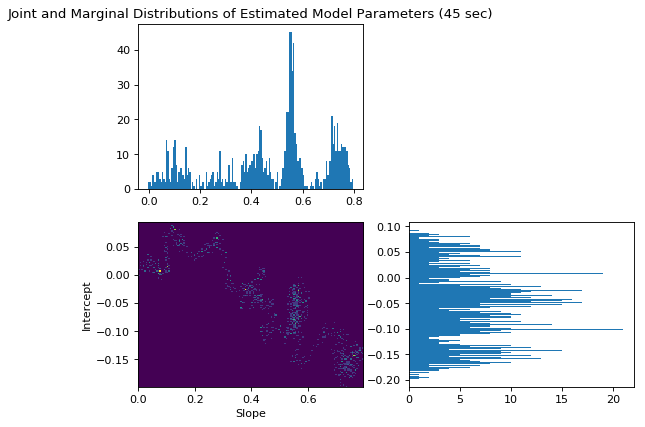

In [20]:
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(gs[0, 0]) 
plt.hist(mest_MCMC_45[:, 0], bins = 150)
plt.title('Joint and Marginal Distributions of Estimated Model Parameters (45 sec)')

ax1 = plt.subplot(gs[1, 1])
plt.hist(mest_MCMC_45[:, 1], bins = 150, orientation= 'horizontal')

ax2 = plt.subplot(gs[1, 0])
plt.hist2d(mest_MCMC_45[:,0], mest_MCMC_45[:, 1], bins = 150)
ax2.set_xlabel('Slope')
ax2.set_ylabel('Intercept')

plt.show()


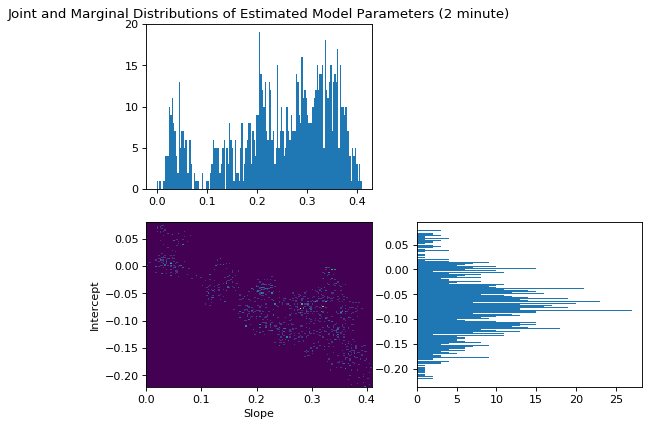

In [21]:
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(gs[0, 0]) 
plt.hist(mest_MCMC_2[:, 0], bins = 150)
plt.title('Joint and Marginal Distributions of Estimated Model Parameters (2 minute)')

ax1 = plt.subplot(gs[1, 1])
plt.hist(mest_MCMC_2[:, 1], bins = 150, orientation= 'horizontal')

ax2 = plt.subplot(gs[1, 0])
plt.hist2d(mest_MCMC_2[:,0], mest_MCMC_2[:, 1], bins = 150)
ax2.set_xlabel('Slope')
ax2.set_ylabel('Intercept')

plt.show()


In [22]:
mest_45_slope_mean_MCMC = np.mean(mest_MCMC_45[:, 0])
mest_45_slope_stdev_MCMC = np.std(mest_MCMC_45[:, 0], ddof = 1)

mest_45_int_mean_MCMC = np.mean(mest_MCMC_45[:, 1])
mest_45_int_stdev_MCMC = np.std(mest_MCMC_45[:, 1], ddof = 1)

mest_2_slope_mean_MCMC = np.mean(mest_MCMC_2[:, 0])
mest_2_slope_stdev_MCMC = np.std(mest_MCMC_2[:, 0], ddof = 1)

mest_2_int_mean_MCMC = np.mean(mest_MCMC_2[:, 1])
mest_2_int_stdev_MCMC = np.std(mest_MCMC_2[:, 1], ddof = 1)

x = np.linspace(-2, 2, 1000)

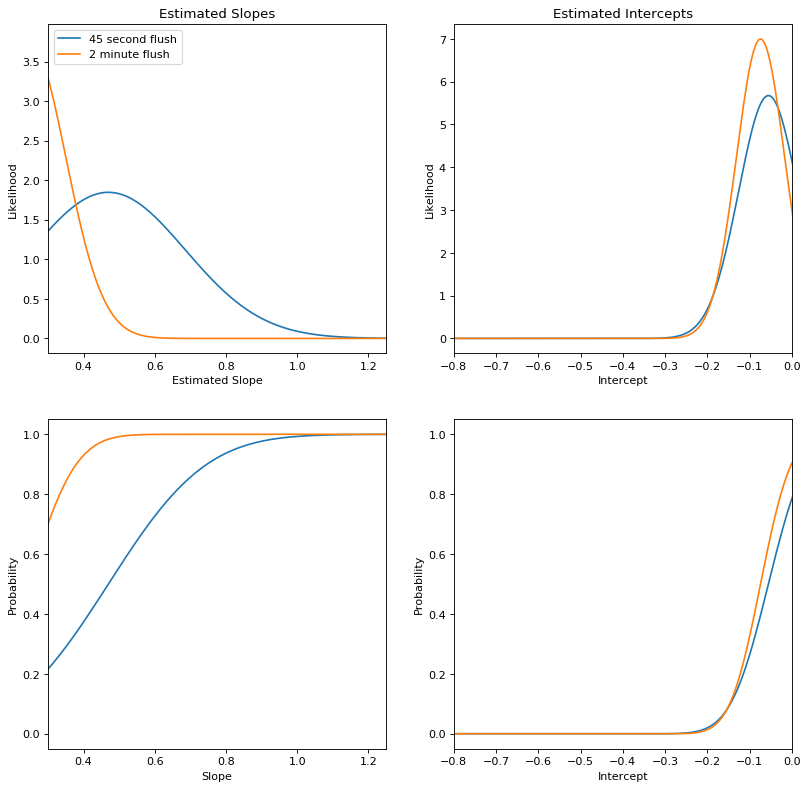

In [23]:
plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0]) 
ax.plot(x, stats.norm.pdf(x,mest_45_slope_mean_MCMC, mest_45_slope_stdev_MCMC), label = '45 second flush')
ax.plot(x, stats.norm.pdf(x,mest_2_slope_mean_MCMC, mest_2_slope_stdev_MCMC), label = '2 minute flush')
ax.legend(loc = 'upper left')
ax.set_xlabel('Estimated Slope')
ax.set_ylabel('Likelihood')
ax.set_xlim([0.3, 1.25])
ax.set_title('Estimated Slopes')

ax1 = plt.subplot(gs[1, 0]) 
ax1.plot(x, stats.norm.cdf(x,mest_45_slope_mean_MCMC, mest_45_slope_stdev_MCMC), label = '45 second flush')
ax1.plot(x, stats.norm.cdf(x,mest_2_slope_mean_MCMC, mest_2_slope_stdev_MCMC), label = '2 minute flush')
ax1.set_xlabel('Slope')
ax1.set_ylabel('Probability')
ax1.set_xlim([0.3, 1.25])

ax2 = plt.subplot(gs[0, 1]) 
ax2.plot(x, stats.norm.pdf(x,mest_45_int_mean_MCMC, mest_45_int_stdev_MCMC), label = '45 second flush')
ax2.plot(x, stats.norm.pdf(x,mest_2_int_mean_MCMC, mest_2_int_stdev_MCMC), label = '2 minute flush')
ax2.set_xlabel('Intercept')
ax2.set_ylabel('Likelihood')
ax2.set_xlim([-.8, 0])
ax2.set_title('Estimated Intercepts')

ax3 = plt.subplot(gs[1, 1]) 
ax3.plot(x, stats.norm.cdf(x,mest_45_int_mean_MCMC, mest_45_int_stdev_MCMC), label = '45 second flush')
ax3.plot(x, stats.norm.cdf(x,mest_2_int_mean_MCMC, mest_2_int_stdev_MCMC), label = '2 minute flush')
ax3.set_xlabel('Intercept')
ax3.set_ylabel('Probability')
ax3.set_xlim([-.8, 0])




plt.show()





<h3> Comparison of Least Squares to MCMC </h3>

In general a Markov-Chain Monte Carlo approach would be best used when given a non-linear problem, as it is computationally expensive. It was used in this exercise to evaluate the effectiveness of bootstrapping. 

<p> Shown below is a comparison of the model parameters generated by bootstrapping and by the MCMC </p>

In [24]:
print('Bootstrapped slope for 45 second runs. Mean: {} Stdev: {}' .format(round(mest_45_slope_mean, 3), round(mest_45_slope_stdev, 3)))
print('MCMC slope for 45 second runs. Mean: {} Stdev: {}' .format(round(mest_45_slope_mean_MCMC, 3), round(mest_45_slope_stdev_MCMC, 3)))

print('Bootstrapped slope for 2 minute runs. Mean: {} Stdev: {}' .format(round(mest_2_slope_mean, 3), round(mest_2_slope_stdev, 3)))
print('MCMC slope for 2 minute runs. Mean: {} Stdev: {}' .format(round(mest_2_slope_mean_MCMC, 3), round(mest_2_slope_stdev_MCMC, 3)))

print('Bootstrapped intercept for 45 second runs. Mean: {} Stdev: {}' .format(round(mest_45_int_mean, 3), round(mest_45_int_stdev, 3)))
print('MCMC intercept for 45 second runs. Mean: {} Stdev: {}' .format(round(mest_45_int_mean_MCMC, 3), round(mest_45_int_stdev_MCMC, 3)))

print('Bootstrapped intercept for 2 minute runs. Mean: {} Stdev: {}' .format(round(mest_2_int_mean, 3), round(mest_2_int_stdev, 3)))
print('MCMC intercept for 2 minute runs. Mean: {} Stdev: {}' .format(round(mest_2_int_mean_MCMC, 3), round(mest_2_int_stdev_MCMC, 3)))

Bootstrapped slope for 45 second runs. Mean: 0.851 Stdev: 0.05
MCMC slope for 45 second runs. Mean: 0.47 Stdev: 0.216
Bootstrapped slope for 2 minute runs. Mean: 0.735 Stdev: 0.055
MCMC slope for 2 minute runs. Mean: 0.245 Stdev: 0.105
Bootstrapped intercept for 45 second runs. Mean: -0.302 Stdev: 0.042
MCMC intercept for 45 second runs. Mean: -0.056 Stdev: 0.07
Bootstrapped intercept for 2 minute runs. Mean: -0.457 Stdev: 0.041
MCMC intercept for 2 minute runs. Mean: -0.074 Stdev: 0.057


<p> It is observed that both the maximum likelihood model parameters from both estimations are consistent with each other (within one standard deviation of each other), which is to be expected as were are sampling model parameters from the same Gaussian distribution. In situations where the problem is linear and Gaussian statistics are assumed it is more advantagous to just perform a least squares inversion. The markov-chain monte carlo estimation was used as an example of how to perform the procedure of a MCMC and to verify the statistics from the boostrapped samples. </p>

 <p> <b>For the remaining analysis the most likely model parameters from the bootstrapped samples will be used. </b> </p>
        
    



<h3> Analysis </h3>

<p> In order to better understand our estimations, let us first determine the fraction of houses for which $Pb_{2}>Pb_{0}$, $Pb_{45}>Pb_{0}$, and $Pb_{2}>Pb_{45}$. </p>

In [25]:
def percent_greater(earlier, later):

    frac_earlier_later = []

    for i in range(len(later)):

        if later[i]>earlier[i]:

            frac_earlier_later.append(later[i])

    percent_greater = len(frac_earlier_later)/len(later)

    return percent_greater

In [26]:
percent_45_0 = percent_greater(concentration_first_draw, concentration_45sec_flush)*100
print(percent_45_0)
percent_2_0 = percent_greater(concentration_first_draw, concentration_2min_flush)*100
print(percent_2_0)
percent_2_45 = percent_greater(concentration_45sec_flush, concentration_2min_flush)*100
print(percent_2_45)

18.081180811808117
8.856088560885608
17.712177121771216


In all three cases, less than 20 percent of houses showed a decrease of concentration from an earlier measurement to a later measurement, which suggests a linear trend may not be a good fit. To confirm this let us look at the coefficient of determination ($R^{2}$)

In [37]:
def coefficient_of_determination(dest, dobs):
    
    residual = np.sum((dest-dobs)**2)
    total = np.sum((dobs-np.mean(dobs))**2)
    R2 = 1 - residual/total
    
    return R2

In [72]:
dest2 = mest_2_int_mean+mest_2_slope_mean*log_concentration_first_draw
dest45 = mest_45_int_mean+mest_45_slope_mean*log_concentration_first_draw

R2_45 = coefficient_of_determination(dest45, log_concentration_45sec_flush)
R2_2 = coefficient_of_determination(dest2, log_concentration_2min_flush)







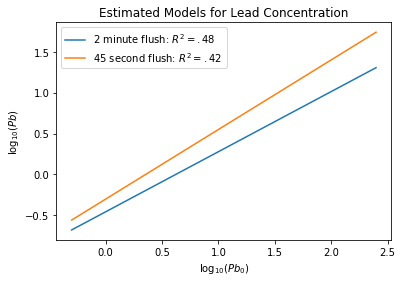

In [73]:
plt.plot(interpolation_points, mest_2_int_mean+mest_2_slope_mean*interpolation_points, label = r'2 minute flush: $R^{2}=.48$')
plt.plot(interpolation_points, mest_45_int_mean+mest_45_slope_mean*interpolation_points, label = '45 second flush: $R^{2}=.42$')
plt.legend(loc = 0)
plt.xlabel(r'$\log_{10}(Pb_{0})$')
plt.ylabel(r'$\log_{10}(Pb)$')
plt.title('Estimated Models for Lead Concentration')
plt.show()

The slopes of our models indicate that for a given initial concentration $Pb_{o}$, $Pb_{2}<Pb_{45}$. However, the coefficient of determination for both models indicate that less than half of the variance is explained by our models. While our smodels predict the expected $Pb_{X{$ concentrations after $X$ flushing, there is still considerable variability of the actual measurements about these expected values. This is borne out by the data, there is a non-negligible fraction of households for which Pb concentration increased as the tap was flushed.